In [6]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm


In [8]:
# Cell 2: Load the Data
# Make sure Prompt1SeatLevel.csv is in the same folder as your notebook
df = pd.read_csv("Prompt1AccountLevel.csv", sep=",")  # adjust sep if needed
print("Data shape:", df.shape)
df.head()


Data shape: (44211, 12)


,Season,AccountNumber,SingleGameTickets,PartialPlanTickets,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,SocialMediaEngagement
0,2023,1,0,0,0,0,$467.00,0,F,12.0,872.0,Low
1,2023,2,2,0,0,0,$116.00,1,A,47.0,485.0,Low
2,2023,3,3,0,0,0,$107.00,1,B,6.0,896.0,Low
3,2023,4,0,0,3,0,$27.00,1,C,3.0,467.0,High
4,2023,5,0,0,2,0,$14.00,1,A,4.0,582.0,Medium


In [11]:
# Load the data (assuming you've already imported pandas as pd)
df = pd.read_csv("Prompt1AccountLevel.csv")

# Check original column names
print("Original columns:", df.columns.tolist())

# Remove any extra whitespace from the column names
df.columns = df.columns.str.strip()

# Confirm cleaned column names
print("Cleaned columns:", df.columns.tolist())

# Clean the AvgSpend column
df['AvgSpend'] = df['AvgSpend'].replace('[\$,]', '', regex=True).astype(float)

# Convert other columns to numeric
df['DistanceToArena'] = pd.to_numeric(df['DistanceToArena'], errors='coerce')
df['BasketballPropensity'] = pd.to_numeric(df['BasketballPropensity'], errors='coerce')
df['GamesAttended'] = pd.to_numeric(df['GamesAttended'], errors='coerce')

# Check unique values for categorical columns
print("Unique values in FanSegment:", df['FanSegment'].unique())
print("Unique values in SocialMediaEngagement:", df['SocialMediaEngagement'].unique())


Original columns: ['Season', 'AccountNumber', 'SingleGameTickets', 'PartialPlanTickets', 'GroupTickets', 'STM', 'AvgSpend', 'GamesAttended', 'FanSegment', 'DistanceToArena', 'BasketballPropensity', 'SocialMediaEngagement']
Cleaned columns: ['Season', 'AccountNumber', 'SingleGameTickets', 'PartialPlanTickets', 'GroupTickets', 'STM', 'AvgSpend', 'GamesAttended', 'FanSegment', 'DistanceToArena', 'BasketballPropensity', 'SocialMediaEngagement']
Unique values in FanSegment: ['F' 'A' 'B' 'C' 'E' 'Limited Data' 'D' 'G']
Unique values in SocialMediaEngagement: ['Low' 'High' 'Medium']


In [12]:
# Cell 4: Create Dummy Variables for Categorical Predictors

# Since FanSegment and SocialMediaEngagement are categorical, create dummy variables.
# Using drop_first=True to avoid the dummy variable trap.
dummies = pd.get_dummies(df[['FanSegment', 'SocialMediaEngagement']], drop_first=True)
dummies.head()

# Concatenate the numeric predictors and the new dummy columns.
# Our predictors are: DistanceToArena, BasketballPropensity, plus the dummies.
X_base = pd.concat([df[['DistanceToArena', 'BasketballPropensity']], dummies], axis=1)
X_base.head()


,DistanceToArena,BasketballPropensity,FanSegment_B,FanSegment_C,FanSegment_D,FanSegment_E,FanSegment_F,FanSegment_G,FanSegment_Limited Data,SocialMediaEngagement_Low,SocialMediaEngagement_Medium
0,12.0,872.0,False,False,False,False,True,False,False,True,False
1,47.0,485.0,False,False,False,False,False,False,False,True,False
2,6.0,896.0,True,False,False,False,False,False,False,True,False
3,3.0,467.0,False,True,False,False,False,False,False,False,False
4,4.0,582.0,False,False,False,False,False,False,False,False,True


In [14]:
# Ensure numeric conversion for key columns
df['GamesAttended'] = pd.to_numeric(df['GamesAttended'], errors='coerce')
df['DistanceToArena'] = pd.to_numeric(df['DistanceToArena'], errors='coerce')
df['BasketballPropensity'] = pd.to_numeric(df['BasketballPropensity'], errors='coerce')

# Create dummy variables for categorical predictors
dummies = pd.get_dummies(df[['FanSegment', 'SocialMediaEngagement']], drop_first=True)

# Create the predictor matrix and ensure all values are numeric
X_base = pd.concat([df[['DistanceToArena', 'BasketballPropensity']], dummies], axis=1)
X_base = X_base.apply(pd.to_numeric, errors='coerce')

# Add constant term for statsmodels
X_games = sm.add_constant(X_base)
X_games = X_games.astype(float)

# Define dependent variable and ensure it is numeric
y_games = pd.to_numeric(df['GamesAttended'], errors='coerce')

# Drop any rows with missing values
mask = X_games.notnull().all(axis=1) & y_games.notnull()
X_games = X_games[mask]
y_games = y_games[mask]

# Fit the OLS model
model_games = sm.OLS(y_games, X_games).fit()

# Print the summary of the regression
print(model_games.summary())


                            OLS Regression Results                            
Dep. Variable:          GamesAttended   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     789.3
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        19:45:20   Log-Likelihood:                -80795.
No. Observations:               36796   AIC:                         1.616e+05
Df Residuals:                   36784   BIC:                         1.617e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

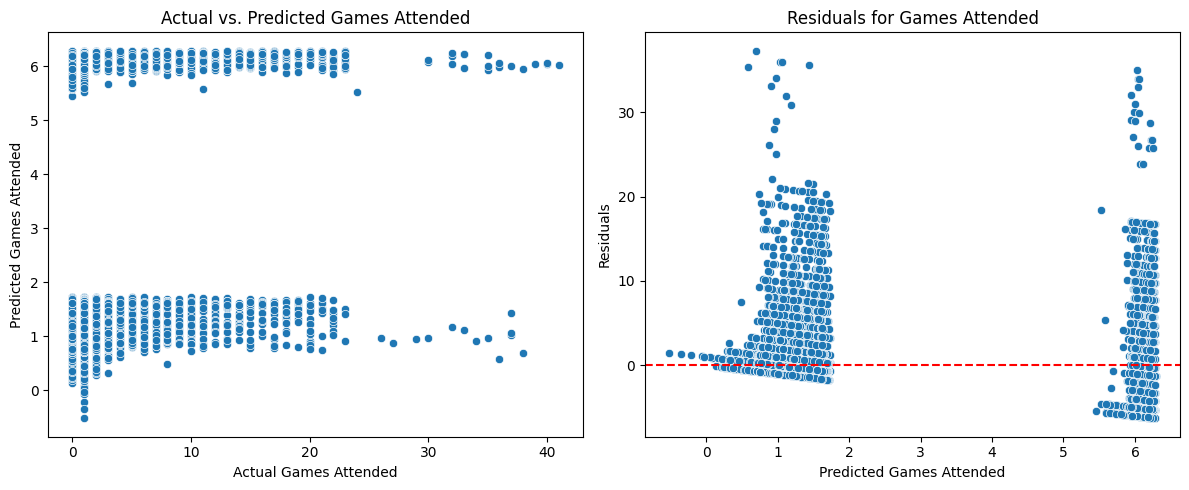

In [15]:
# Cell 6: Plotting Results for GamesAttended

# Calculate predicted values
df['GamesAttended_Pred'] = model_games.predict(X_games)

# Create a figure with two subplots: Actual vs. Predicted and Residuals plot
plt.figure(figsize=(12, 5))

# Subplot 1: Actual vs. Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['GamesAttended'], y=df['GamesAttended_Pred'])
plt.xlabel("Actual Games Attended")
plt.ylabel("Predicted Games Attended")
plt.title("Actual vs. Predicted Games Attended")

# Subplot 2: Residual Plot
residuals_games = df['GamesAttended'] - df['GamesAttended_Pred']
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['GamesAttended_Pred'], y=residuals_games)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Games Attended")
plt.ylabel("Residuals")
plt.title("Residuals for Games Attended")

plt.tight_layout()
plt.show()


In [17]:
# Cell 7: Linear Regression for AvgSpend (Combined Cell)

import statsmodels.api as sm

# --- Data Conversion ---
# Remove the "$" and commas from AvgSpend, then convert to numeric
df['AvgSpend'] = pd.to_numeric(df['AvgSpend'].replace('[\$,]', '', regex=True), errors='coerce')

# Ensure other numeric columns are converted properly
df['DistanceToArena'] = pd.to_numeric(df['DistanceToArena'], errors='coerce')
df['BasketballPropensity'] = pd.to_numeric(df['BasketballPropensity'], errors='coerce')

# --- Create Dummy Variables ---
# For the categorical columns FanSegment and SocialMediaEngagement, create dummy variables (drop_first avoids multicollinearity)
dummies = pd.get_dummies(df[['FanSegment', 'SocialMediaEngagement']], drop_first=True)

# --- Build the Predictor Matrix ---
# Combine the numeric predictors with the dummy variables
X_base = pd.concat([df[['DistanceToArena', 'BasketballPropensity']], dummies], axis=1)

# Force conversion of all predictors to numeric (in case of any stray object types)
X_base = X_base.apply(pd.to_numeric, errors='coerce')

# Add a constant term to the predictor matrix for the intercept
X_spend = sm.add_constant(X_base).astype(float)

# --- Prepare the Dependent Variable ---
y_spend = pd.to_numeric(df['AvgSpend'], errors='coerce')

# --- Handle Missing Values ---
# Create a mask to drop any rows with missing values in either the predictors or the dependent variable
mask = X_spend.notnull().all(axis=1) & y_spend.notnull()
X_spend_clean = X_spend[mask]
y_spend_clean = y_spend[mask]

# --- Fit the OLS Model ---
model_spend = sm.OLS(y_spend_clean, X_spend_clean).fit()

# --- Print the Summary ---
print(model_spend.summary())


                            OLS Regression Results                            
Dep. Variable:               AvgSpend   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     199.7
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        19:47:12   Log-Likelihood:            -2.1741e+05
No. Observations:               36796   AIC:                         4.348e+05
Df Residuals:                   36784   BIC:                         4.349e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

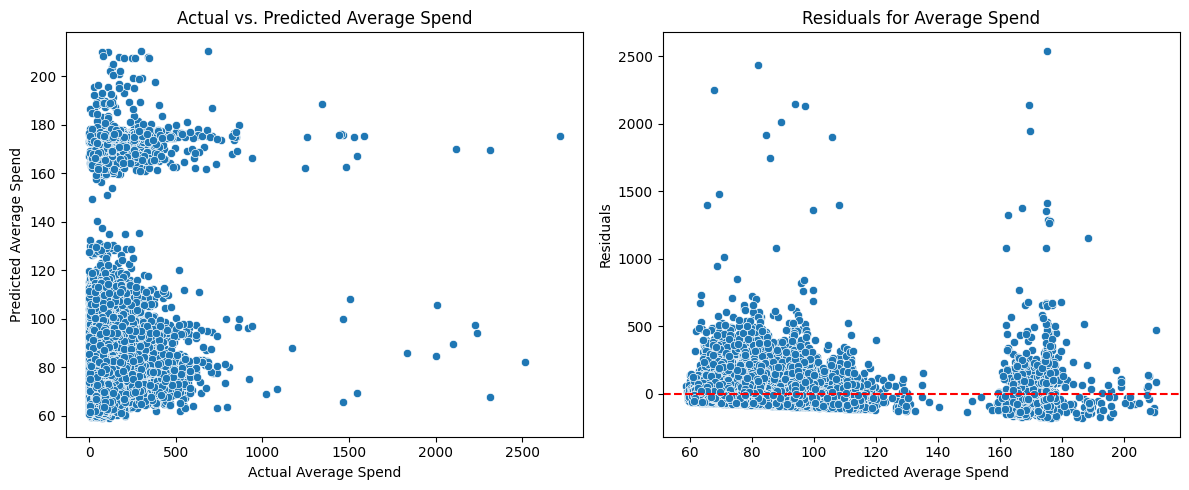

In [18]:
# Cell 8: Plotting Results for AvgSpend

# Calculate predicted values for AvgSpend
df['AvgSpend_Pred'] = model_spend.predict(X_spend)

# Create a figure with two subplots: Actual vs. Predicted and Residuals plot
plt.figure(figsize=(12, 5))

# Subplot 1: Actual vs. Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['AvgSpend'], y=df['AvgSpend_Pred'])
plt.xlabel("Actual Average Spend")
plt.ylabel("Predicted Average Spend")
plt.title("Actual vs. Predicted Average Spend")

# Subplot 2: Residual Plot
residuals_spend = df['AvgSpend'] - df['AvgSpend_Pred']
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['AvgSpend_Pred'], y=residuals_spend)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Average Spend")
plt.ylabel("Residuals")
plt.title("Residuals for Average Spend")

plt.tight_layout()
plt.show()


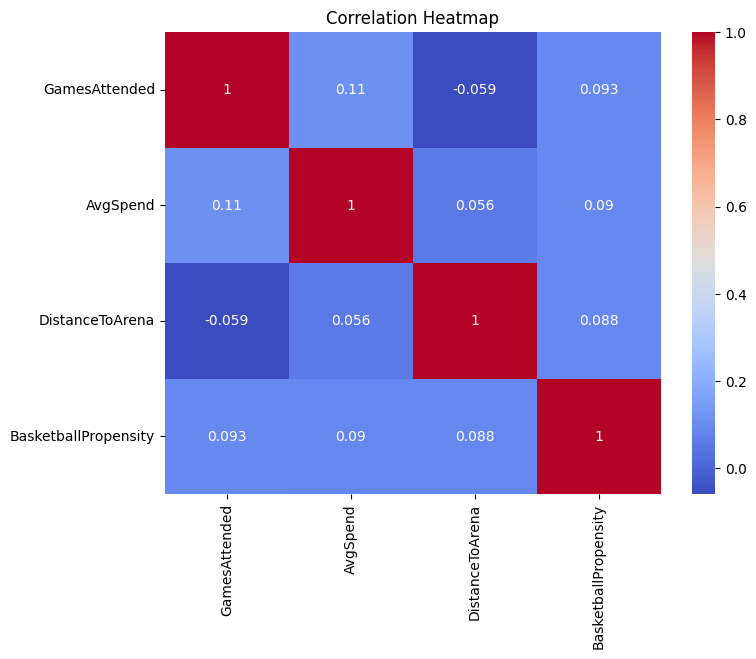

In [19]:
# Cell 9: Correlation Heatmap
plt.figure(figsize=(8, 6))
numeric_cols = ['GamesAttended', 'AvgSpend', 'DistanceToArena', 'BasketballPropensity']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
